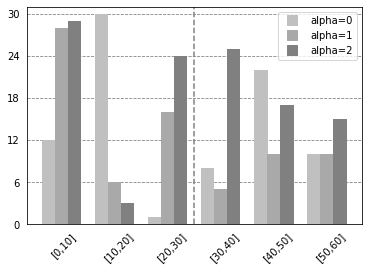

In [0]:
#@title Useful Functions (for legend, ticks, grid)
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22, 10]
bars2 = [28, 6, 16, 5, 10, 10]
bars3 = [29, 3, 24, 25, 17, 15]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth -0.01 for x in r1]
r3 = [x + barWidth for x in r2]

x = (r1[int(len(bars1)/2)] + r3[int(len(bars1)/2)-1])/2
y_mins = [min(bars1), min(bars2), min(bars3)]
y_maxs = [max(bars1), max(bars2), max(bars3)]

y_min = min(y_mins)
y_max = max(y_maxs)

# ax = plt.gca()
# ax.grid(which='major', axis='both', linestyle='--')

# plt.gca().yaxis.grid(True)
# Make the plot
plt.bar(r1, bars1, color='#C0C0C0', width=barWidth, label='alpha = 0')
plt.bar(r2, bars2, color='#A9A9A9', width=barWidth, label='var2')
plt.bar(r3, bars3, color='#808080', width=barWidth, label='var3')
 

# Add xticks on the middle of the group bars
# plt.xlabel('group', fontweight='bold')

# Para colocar intervalos na parte inferior personalizados
# plt.xticks([r + barWidth for r in range(len(bars1))], ['[-90 -100]', 'B', 'C', 'D', 'E'], rotation=45)
# plt.xticks([r for r in range(len(bars1))], ['[-90 -100]', 'B', 'C', 'D', 'E'], rotation=45, )

plt.plot([x,x],[y_min - 1, y_max + 1], '--', color='gray')
plt.ylim((y_min - 1, y_max + 1))
# Create legend & Show graphic

axes = plt.gca()
# axes.xaxis.grid()
# plt.rc('axes', axisbelow=True)
# plt.rcParams['axes.axisbelow'] = True
axes.yaxis.grid(color='gray', linestyle='dashed')
axes.set_axisbelow(True)

#Para mostrar apenas 6 valores de y na barra vertical 
axes.yaxis.set_major_locator(plt.MaxNLocator(6))

#Para colocar intervalos na parte inferior personalizados
def format_func(value, tick_number):
    value = int(value)
    if True:
        return "[" + str(value*10) + "," + str((value+1) * 10) + "]"
axes.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.xticks(rotation=45)

#Para remover a posição no eixo do tick
axes.xaxis.set_ticks_position('none') 
axes.yaxis.set_ticks_position('none') 

#Coloca os x_ticks mais à esquerda
plt.setp(axes.xaxis.get_majorticklabels(), rotation=45, ha="left")

from matplotlib.lines import Line2D

rect1 = Line2D([], [], marker="s", markersize=10, linewidth=0, color='#C0C0C0')
rect2 = Line2D([], [], marker="s", markersize=10, linewidth=0, color='#A9A9A9')
rect3 = Line2D([], [], marker="s", markersize=10, linewidth=0, color='#808080')

plt.legend((rect1, rect2, rect3), ('alpha=0', 'alpha=1', 'alpha=2'))

#plt.legend(handles=legend_elements)
plt.show()

In [0]:
#@title Script Execution

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import sys

# cada linha é uma recomendação e cada coluna a diferença
# do algoritmo menos o baseline

# Reading the data
def nextk(n, k=10):
    if n < 0:
        return -1 * (abs(n) + (k - abs(n) % k))
    if (n % k):
        return n + (k - n % k)
    return n
    

if __name__ == '__main__':
    name_file = sys.argv[1]
    if len(sys.argv) > 2:
        k = int(sys.argv[2])
    else:
        k = 15
    my_file_simulation = open(name_file, 'r')

    #k = 15
    nfator = 100
    separator = '\t'
    rot = 80

    # Para mais de cinco sistemas adicioar mais cores
    colors = ['#D3D3D3', '#C0C0C0', '#A9A9A9', '#808080', '#696969', '#000000']
    # Defina as legendas conforme a ordem do array
    barWidth = 0.15


    all_values = []
    max_diference = 0
    cont = 0
    for line in my_file_simulation:
        line = line.replace('\n', '')

        if cont == 0:
            legends = line.split(separator)
            cont += 1
            continue

        if line == '':
            break
        values = [nfator*float(x) for x in line.split(separator)]
        max_values = max(values)
        min_values = abs(min(values))

        if max_diference < max_values:
            max_diference = max_values

        if max_diference < min_values:
            max_diference = min_values

        all_values.append(values)

    minimo_interval = nextk(-1 * max_diference, k)
    maximo_interval = nextk(max_diference, k)

    # n_bins = 2*int(maximo_interval/k)

    x_labels = np.arange(minimo_interval, maximo_interval, k)
    n_bins = x_labels.size

    numEvaluated = len(all_values[0])
    numSystem = len(all_values)

    vet = []
    for i in range(numEvaluated):
        vet.append([0] * n_bins)
    for i in range(numSystem):
        for j in range(numEvaluated):
            flag = True
            for index in range(n_bins - 1):
                if all_values[i][j] < x_labels[index + 1]:
                    vet[j][index] += 1
                    flag = False
                    break
            if flag:
                vet[j][-1] += 1

    array_bars = vet

    # Plotting

    numSystems = len(array_bars[0])
    # Calc position of bar on X axis
    position_bars = []
    position_bars.append(np.arange(1, numSystems + 1))

    for i in range(1, len(array_bars)):
        temp = [x + barWidth for x in position_bars[i - 1]]
        position_bars.append(temp)

    x = (position_bars[0][int(numSystems / 2)] + position_bars[-1][int(numSystems / 2) - 1]) / 2

    # Make the plot
    y_min = min(array_bars[0])
    y_max = max(array_bars[0])
    for index in range(len(array_bars)):
        plt.bar(position_bars[index], array_bars[index], color=colors[index], width=barWidth)
        min_temp = min(array_bars[index])
        if y_min > min_temp:
            y_min = min_temp

        max_temp = max(array_bars[index])
        if y_max < max_temp:
            y_max = max_temp

    # Para colocar intervalos na parte inferior personalizados
    # plt.xticks([r + barWidth for r in range(len(bars1))], ['[-90 -100]', 'B', 'C', 'D', 'E'], rotation=45)
    # plt.xticks([r for r in range(len(bars1))], ['[-90 -100]', 'B', 'C', 'D', 'E'], rotation=45, )

    # define o limite do eixo y até onde desenhei a reta tracejada ao centro
    plt.plot([x, x], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], '--', color='gray')
    plt.ylim((y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)))

    axes = plt.gca()
    # Coloca as grades cor cinza
    axes.yaxis.grid(color='gray', linestyle='dashed')
    # Coloca as grades atrés dos plots 
    axes.set_axisbelow(True)

    # Para mostrar apenas 6 valores de y na barra vertical 
    axes.yaxis.set_major_locator(plt.MaxNLocator(6))


    # Para colocar intervalos na parte inferior personalizados
    # axes.xaxis.set_major_locator(plt.MaxNLocator(len(x_labels)))

    def format_func(value, tick_number):
        value = int(value)
        return "[" + str((x_labels[tick_number])/nfator) + "," + str((x_labels[tick_number] + k)/nfator) + "]"


    plt.xticks(np.arange(1, 1 + len(x_labels)))
    axes.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    plt.xticks(rotation=45)

    # Para remover a posição no eixo do tick
    axes.xaxis.set_ticks_position('none')
    axes.yaxis.set_ticks_position('none')

    # Coloca os x_ticks mais à esquerda
    plt.setp(axes.xaxis.get_majorticklabels(), rotation=rot , ha="left")

    rects = []
    # Faz os quadrados com as cores da caixinhda de legendas para cada tipo
    for index in range(len(array_bars)):
        rects.append(Line2D([], [], marker="s", markersize=10, linewidth=0, color=colors[index]))

    plt.legend(tuple(rects), tuple(legends), fontsize=8, loc='upper left')
    plt.savefig(name_file+".png", bbox_inches='tight')
    #plt.show()


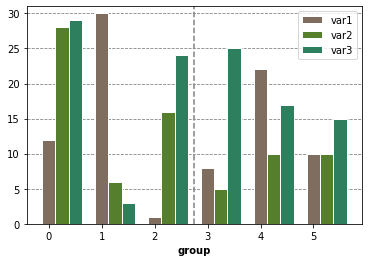

In [0]:
#@title Inicial Plot
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22, 10]
bars2 = [28, 6, 16, 5, 10, 10]
bars3 = [29, 3, 24, 25, 17, 15]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

x = (r1[int(len(bars1)/2)] + r3[int(len(bars1)/2)-1])/2
y_mins = [min(bars1), min(bars2), min(bars3)]
y_maxs = [max(bars1), max(bars2), max(bars3)]

y_min = min(y_mins)
y_max = max(y_maxs)

# ax = plt.gca()
# ax.grid(which='major', axis='both', linestyle='--')

# plt.gca().yaxis.grid(True)
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
# plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
#Faz o plot dad linha tracejada no centro do histograma
plt.plot([x,x],[y_min - 1, y_max + 1], '--', color='gray')
plt.ylim((y_min - 1, y_max + 1))

#Para adicionar as grades horizontais
axes = plt.gca()
axes.yaxis.grid(color='gray', linestyle='dashed')
#Para colocar as grades horizontais abaixo da figura
axes.set_axisbelow(True)


plt.legend()
plt.show()

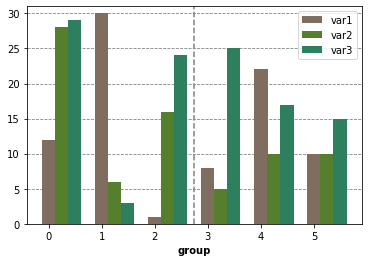

In [0]:
#@title Remove White Edges
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22, 10]
bars2 = [28, 6, 16, 5, 10, 10]
bars3 = [29, 3, 24, 25, 17, 15]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth -0.01 for x in r1]
r3 = [x + barWidth for x in r2]

x = (r1[int(len(bars1)/2)] + r3[int(len(bars1)/2)-1])/2
y_mins = [min(bars1), min(bars2), min(bars3)]
y_maxs = [max(bars1), max(bars2), max(bars3)]

y_min = min(y_mins)
y_max = max(y_maxs)

# ax = plt.gca()
# ax.grid(which='major', axis='both', linestyle='--')

# plt.gca().yaxis.grid(True)
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
# plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
plt.plot([x,x],[y_min - 1, y_max + 1], '--', color='gray')
plt.ylim((y_min - 1, y_max + 1))
# Create legend & Show graphic

axes = plt.gca()
# axes.xaxis.grid()
# plt.rc('axes', axisbelow=True)
# plt.rcParams['axes.axisbelow'] = True
axes.yaxis.grid(color='gray', linestyle='dashed')
axes.set_axisbelow(True)


plt.legend()
plt.show()

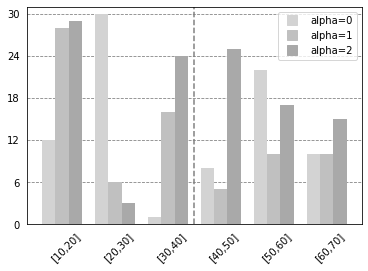

In [0]:
##@title Useful Functions (for legend, ticks, grid)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# set width of bar
barWidth = 0.25
 
# set height of bar
array_bars = []
array_bars.append([12, 30, 1, 8, 22, 10])
array_bars.append([28, 6, 16, 5, 10, 10])
array_bars.append([29, 3, 24, 25, 17, 15])

#Defina as legendas conforme a ordem do array
legends = ['alpha=0', 'alpha=1', 'alpha=2']

# Para mais de cinco sistemas adicioar mais cores
colors = ['#D3D3D3',  '#C0C0C0',  '#A9A9A9',  '#808080',  '#696969']



numSystems = len(array_bars[0])
# Calc position of bar on X axis
position_bars = []
position_bars.append(np.arange(1,numSystems+1))

for i in range(1, len(array_bars)):
    temp = [x + barWidth for x in position_bars[i-1]]
    position_bars.append(temp)

x = (position_bars[0][int(numSystems/2)] + position_bars[-1][int(numSystems/2)-1])/2


# Make the plot
y_min = min(array_bars[0])
y_max = max(array_bars[0])
for index in range(len(array_bars)):
    plt.bar(position_bars[index], array_bars[index], color=colors[index], width=barWidth)
    min_temp = min(array_bars[index])
    if y_min > min_temp:
        y_min = min_temp

    max_temp = max(array_bars[index])
    if y_max < max_temp:
        y_max = max_temp


# Para colocar intervalos na parte inferior personalizados
# plt.xticks([r + barWidth for r in range(len(bars1))], ['[-90 -100]', 'B', 'C', 'D', 'E'], rotation=45)
# plt.xticks([r for r in range(len(bars1))], ['[-90 -100]', 'B', 'C', 'D', 'E'], rotation=45, )

#define o limite do eixo y até onde desenhei a reta tracejada ao centro
plt.plot([x,x],[y_min - 1, y_max + 1], '--', color='gray')
plt.ylim((y_min - 1, y_max + 1))


axes = plt.gca()
# Coloca as grades cor cinza
axes.yaxis.grid(color='gray', linestyle='dashed')
# Coloca as grades atrés dos plots 
axes.set_axisbelow(True)

#Para mostrar apenas 6 valores de y na barra vertical 
axes.yaxis.set_major_locator(plt.MaxNLocator(6))

#Para colocar intervalos na parte inferior personalizados
def format_func(value, tick_number):
    value = int(value)
    if True:
        return "[" + str(value*10) + "," + str((value+1) * 10) + "]"
axes.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.xticks(rotation=45)

#Para remover a posição no eixo do tick
axes.xaxis.set_ticks_position('none') 
axes.yaxis.set_ticks_position('none') 

#Coloca os x_ticks mais à esquerda
plt.setp(axes.xaxis.get_majorticklabels(), rotation=45, ha="left")


rects = []
#Faz os quadrados com as cores da caixinhda de legendas para cada tipo
for index in range(len(array_bars)):
    rects.append(Line2D([], [], marker="s", markersize=10, linewidth=0, color=colors[index]))

plt.legend(tuple(rects), tuple(legends))
plt.show()

In [0]:
#@title Old
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


# cada linha é uma recomendação e cada coluna a diferença
# do algoritmo menos o baseline

# Reading the data
def nextk(n, k=10):
    if n < 0:
        return -1 * (abs(n) + (k - abs(n) % k))
    if (n % k):
        return n + (k - n % k)
    return n
name_file = 'a.tsv'
my_file_simulation = open(name_file, 'r')
# my_file_simulation = 'a1\ta2\ta3\n-1 2 3\n0 -2 1\n1 1 1\n1 2 -3\n0 -2 1\n0 2 1\n4 3 0\n-1 -1 -1\n-1 2 3\n'
# my_file_simulation = my_file_simulation.replace(' ', '\t')
k = 15
nfator = 100
separator = '\t'
rot = 80
# Para mais de cinco sistemas adicioar mais cores
colors = ['#D3D3D3', '#C0C0C0', '#A9A9A9', '#808080', '#696969', '#000000']
# Defina as legendas conforme a ordem do array
# legends = ['alpha=0', 'alpha=1', 'alpha=2']
barWidth = 0.15
# my_file_simulation = my_file_simulation.split('\n')

all_values = []
max_diference = 0

cont = 0
for line in my_file_simulation:
    line = line.replace('\n', '')
    if cont == 0:
        legends = line.split(separator)
        cont += 1
        continue
    
    if line == '':
        break
    values = [nfator*float(x) for x in line.split(separator)]
    max_values = max(values)
    min_values = abs(min(values))

    if max_diference < max_values:
        max_diference = max_values

    if max_diference < min_values:
        max_diference = min_values

    all_values.append(values)

minimo_interval = nextk(-1 * max_diference, k)
maximo_interval = nextk(max_diference, k)

# n_bins = 2*int(maximo_interval/k)

x_labels = np.arange(minimo_interval, maximo_interval + k, k)
n_bins = x_labels.size

numEvaluated = len(all_values[0])
numSystem = len(all_values)

vet = []
for i in range(numEvaluated):
    vet.append([0] * n_bins)
for i in range(numSystem):
    for j in range(numEvaluated):
        flag = True
        for index in range(n_bins - 1):
            if all_values[i][j] < x_labels[index + 1]:
                vet[j][index] += 1
                flag = False
                break
        if flag:
            vet[j][-1] += 1

array_bars = vet

# Plotting

numSystems = len(array_bars[0])
# Calc position of bar on X axis
position_bars = []
position_bars.append(np.arange(1, numSystems + 1))

for i in range(1, len(array_bars)):
    temp = [x + barWidth for x in position_bars[i - 1]]
    position_bars.append(temp)

x = (position_bars[0][int(numSystems / 2)] + position_bars[-1][int(numSystems / 2) - 1]) / 2

# Make the plot
y_min = min(array_bars[0])
y_max = max(array_bars[0])
for index in range(len(array_bars)):
    plt.bar(position_bars[index], array_bars[index], color=colors[index], width=barWidth)
    min_temp = min(array_bars[index])
    if y_min > min_temp:
        y_min = min_temp

    max_temp = max(array_bars[index])
    if y_max < max_temp:
        y_max = max_temp

# Para colocar intervalos na parte inferior personalizados
# plt.xticks([r + barWidth for r in range(len(bars1))], ['[-90 -100]', 'B', 'C', 'D', 'E'], rotation=45)
# plt.xticks([r for r in range(len(bars1))], ['[-90 -100]', 'B', 'C', 'D', 'E'], rotation=45, )

# define o limite do eixo y até onde desenhei a reta tracejada ao centro
plt.plot([x, x], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], '--', color='gray')
plt.ylim((y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)))

axes = plt.gca()
# Coloca as grades cor cinza
axes.yaxis.grid(color='gray', linestyle='dashed')
# Coloca as grades atrés dos plots 
axes.set_axisbelow(True)

# Para mostrar apenas 6 valores de y na barra vertical 
axes.yaxis.set_major_locator(plt.MaxNLocator(6))


# Para colocar intervalos na parte inferior personalizados
# axes.xaxis.set_major_locator(plt.MaxNLocator(len(x_labels)))

def format_func(value, tick_number):
    value = int(value)
    return "[" + str(x_labels[tick_number]/nfator) + "," + str((x_labels[tick_number] + k)/nfator) + "]"


plt.xticks(np.arange(1, 1 + len(x_labels)))
axes.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.xticks(rotation=90)

# Para remover a posição no eixo do tick
axes.xaxis.set_ticks_position('none')
axes.yaxis.set_ticks_position('none')

# Coloca os x_ticks mais à esquerda
plt.setp(axes.xaxis.get_majorticklabels(), rotation=rot)  # , ha="right")

rects = []
# Faz os quadrados com as cores da caixinhda de legendas para cada tipo
for index in range(len(array_bars)):
    rects.append(Line2D([], [], marker="s", markersize=10, linewidth=0, color=colors[index]))

plt.legend(tuple(rects), tuple(legends), loc='upper left')
plt.savefig(name_file+".png", bbox_inches='tight')
plt.show()


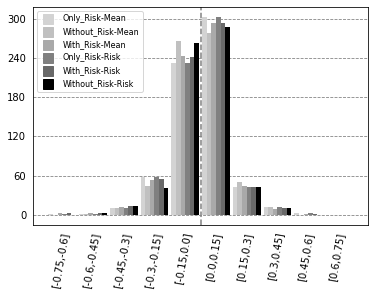

In [0]:
##@title
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


# cada linha é uma recomendação e cada coluna a diferença
# do algoritmo menos o baseline

# Reading the data
def nextk(n, k=10):
    if n < 0:
        return -1 * (abs(n) + (k - abs(n) % k))
    if (n % k):
        return n + (k - n % k)
    return n


name_file = 'b.tsv'
my_file_simulation = open(name_file, 'r')

k = 15
nfator = 100
separator = '\t'
rot = 80

# Para mais de cinco sistemas adicioar mais cores
colors = ['#D3D3D3', '#C0C0C0', '#A9A9A9', '#808080', '#696969', '#000000']
# Defina as legendas conforme a ordem do array
barWidth = 0.15


all_values = []
max_diference = 0
cont = 0
for line in my_file_simulation:
    line = line.replace('\n', '')

    if cont == 0:
        legends = line.split(separator)
        cont += 1
        continue

    if line == '':
        break
    values = [nfator*float(x) for x in line.split(separator)]
    max_values = max(values)
    min_values = abs(min(values))

    if max_diference < max_values:
        max_diference = max_values

    if max_diference < min_values:
        max_diference = min_values

    all_values.append(values)

minimo_interval = nextk(-1 * max_diference, k)
maximo_interval = nextk(max_diference, k)

# n_bins = 2*int(maximo_interval/k)

x_labels = np.arange(minimo_interval, maximo_interval, k)
n_bins = x_labels.size

numEvaluated = len(all_values[0])
numSystem = len(all_values)

vet = []
for i in range(numEvaluated):
    vet.append([0] * n_bins)
for i in range(numSystem):
    for j in range(numEvaluated):
        flag = True
        for index in range(n_bins - 1):
            if all_values[i][j] < x_labels[index + 1]:
                vet[j][index] += 1
                flag = False
                break
        if flag:
            vet[j][-1] += 1

array_bars = vet

# Plotting

numSystems = len(array_bars[0])
# Calc position of bar on X axis
position_bars = []
position_bars.append(np.arange(1, numSystems + 1))

for i in range(1, len(array_bars)):
    temp = [x + barWidth for x in position_bars[i - 1]]
    position_bars.append(temp)

x = (position_bars[0][int(numSystems / 2)] + position_bars[-1][int(numSystems / 2) - 1]) / 2

# Make the plot
y_min = min(array_bars[0])
y_max = max(array_bars[0])
for index in range(len(array_bars)):
    plt.bar(position_bars[index], array_bars[index], color=colors[index], width=barWidth)
    min_temp = min(array_bars[index])
    if y_min > min_temp:
        y_min = min_temp

    max_temp = max(array_bars[index])
    if y_max < max_temp:
        y_max = max_temp

# Para colocar intervalos na parte inferior personalizados
# plt.xticks([r + barWidth for r in range(len(bars1))], ['[-90 -100]', 'B', 'C', 'D', 'E'], rotation=45)
# plt.xticks([r for r in range(len(bars1))], ['[-90 -100]', 'B', 'C', 'D', 'E'], rotation=45, )

# define o limite do eixo y até onde desenhei a reta tracejada ao centro
plt.plot([x, x], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], '--', color='gray')
plt.ylim((y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)))

axes = plt.gca()
# Coloca as grades cor cinza
axes.yaxis.grid(color='gray', linestyle='dashed')
# Coloca as grades atrés dos plots 
axes.set_axisbelow(True)

# Para mostrar apenas 6 valores de y na barra vertical 
axes.yaxis.set_major_locator(plt.MaxNLocator(6))


# Para colocar intervalos na parte inferior personalizados
# axes.xaxis.set_major_locator(plt.MaxNLocator(len(x_labels)))

def format_func(value, tick_number):
    value = int(value)
    return "[" + str((x_labels[tick_number])/nfator) + "," + str((x_labels[tick_number] + k)/nfator) + "]"


plt.xticks(np.arange(1, 1 + len(x_labels)))
axes.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.xticks(rotation=45)

# Para remover a posição no eixo do tick
axes.xaxis.set_ticks_position('none')
axes.yaxis.set_ticks_position('none')

# Coloca os x_ticks mais à esquerda
plt.setp(axes.xaxis.get_majorticklabels(), rotation=rot , ha="left")

rects = []
# Faz os quadrados com as cores da caixinhda de legendas para cada tipo
for index in range(len(array_bars)):
    rects.append(Line2D([], [], marker="s", markersize=10, linewidth=0, color=colors[index]))

plt.legend(tuple(rects), tuple(legends), fontsize=8, loc='upper left')
plt.savefig(name_file+".png", bbox_inches='tight')
plt.show()

In [0]:
x_labels

array([-75., -60., -45., -30., -15.,   0.,  15.,  30.,  45.,  60.])